# **Assignment 10**

## by Catherine Cho

In [1]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library

In [2]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()
boston = ds.load_boston()

/Users/catherinecho/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [3]:
# columns are assigned attribute feature_names
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# target attribute shows values 0: Setosa, 1: Versicolour, 2: Virginica
target = iris.target
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [6]:
# KNN represents import. Neighbors defined as 5
knn = KNN(n_neighbors = 5)

# define features and labels
features = iris.data
label = iris.target

#train model using features and labels
knn.fit(features, label)

# new observation created for prediction. 
new_observations = [[5,4,3,0.1]]
predicted = knn.predict(new_observations)

# dictionary defined between encoded values and target names
target_names = {0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'}

#target name is returned by referencing dictionary
print(target_names.get(int(predicted)))

Setosa


**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [21]:
# train and test set is split.
X_train, X_test, y_train, y_test = tts(features, label, test_size = 0.3, random_state = 123,  stratify = label)

# the train dataset is used to train the KNN model
knn.fit(X_train, y_train)

# Score of test dataset is printed
print(knn.score(X_test, y_test))

0.9555555555555556


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

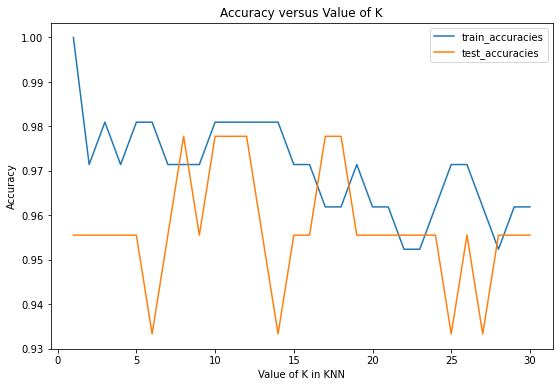

In [22]:
# the accuracies of the train and test datasets will be appended in dictionary below. 
train_accuracies = {}
test_accuracies = {}

# K values from 1 to 30 (inclusive) are modeled and accuracies of the traininga and test set is recorded. 
neighbors = np.arange(1,31)
for neighbor in neighbors:
    knn = KNN(n_neighbors = neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# matplotlib is used to plot the plots of each train and test dataset.     
fig, ax = plt.subplots(figsize = (9,6))
plt.plot(train_accuracies.keys(), train_accuracies.values(), label = 'train_accuracies')
plt.plot(test_accuracies.keys(), test_accuracies.values(), label = 'test_accuracies')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.title('Accuracy versus Value of K')
plt.legend()

**The plot above shows that train accuracy increases as complexity of the model increases. A lower K value means a more complex model.**

**The test accuracy is penalized as the complexity of the model decreases. A higher K value means a less complex model.**

**Q5** 10 pts

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

In [23]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
# Details of boston dataset features and labels. 
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [25]:
# Target attribute accessed and converted to DataFrame. Target: MEDV or median value of owner-occupied homes in $1000s
target_df = pd.DataFrame(boston.target)

In [26]:
# average of AGE
boston_df['AGE'].mean()

68.57490118577078

In [27]:
# average of target in $1000s
print(target_df.mean())

#target as numpy values
target_array = np.array(target_df).reshape(-1,1)
target_array.shape

0    22.532806
dtype: float64


(506, 1)

**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

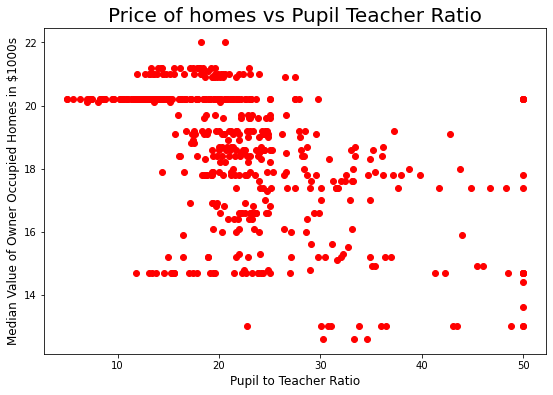

In [28]:
# median value of homes vs. pupil teacher ratio
plt.subplots(figsize = (9,6))
plt.scatter(target_array, boston_df['PTRATIO'], color = "red")
plt.xlabel('Pupil to Teacher Ratio', fontsize = 12)
plt.ylabel('Median Value of Owner Occupied Homes in $1000s', fontsize = 12)
plt.title('Price of homes vs Pupil Teacher Ratio', fontsize = 20)
plt.show()

In [29]:
# PTRATIO converted to numpy array... required for Linear Regression.
# Reshaped to be a 2 dimensional array... also required for Linear Regression. 
PTRATIO_array = np.array(boston_df['PTRATIO']).reshape(-1,1)
PTRATIO_array.shape

(506, 1)

**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately

Text(0.5, 1.0, 'Price of homes vs Pupil Teacher Ratio')

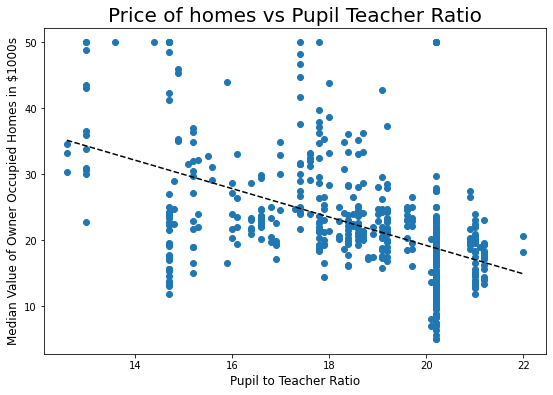

In [30]:
# Model being built
reg = lm.LinearRegression()

# Dataset is trained using features and labels as arrays
reg.fit(PTRATIO_array,target_array)

# Prediction space is defined and reshaped. 
prediction_space = np.linspace(PTRATIO_array.min(),PTRATIO_array.max()).reshape(-1,1)

# Predictions made using the prediction_space (Pupil to Teacher Ratio)
predictions = reg.predict(prediction_space)

# The scatter plot is defined. 
plt.subplots(figsize = (9,6))
plt.scatter(PTRATIO_array,target_array)

# The Regression line is over-layed on scatter plot. 
plt.plot(prediction_space,predictions,linestyle = '--',color = 'black')
plt.xlabel('Pupil to Teacher Ratio', fontsize = 12)
plt.ylabel('Median Value of Owner Occupied Homes in $1000s', fontsize = 12)
plt.title('Price of homes vs Pupil Teacher Ratio', fontsize = 20)